In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import os

In [2]:
# Use CPU
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [3]:
print(tensorflow.__version__)

2.8.0


In [4]:
# Dataset
df=pd.read_csv('./../../dataset/raw_yogyakarta.csv', parse_dates=["date"], index_col="date")
#df['daily_case'] = df['daily_case'].str.replace(',','').astype(int)

# Cut dataset to start from 1 April 2022
df = df[16:]
df.head()

,daily_case
date,
2020-04-01,6
2020-04-02,0
2020-04-03,0
2020-04-04,5
2020-04-05,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 766 entries, 2020-04-01 to 2022-05-06
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   daily_case  766 non-null    int64
dtypes: int64(1)
memory usage: 12.0 KB


In [6]:
df.shape

(766, 1)

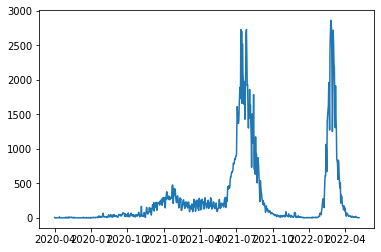

In [7]:
plt.plot(df)

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))

In [9]:
df.shape

(766, 1)

In [10]:
df.head()

,daily_case
date,
2020-04-01,6
2020-04-02,0
2020-04-03,0
2020-04-04,5
2020-04-05,1


In [11]:
# df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [12]:
df.shape

(766, 1)

In [13]:
# Split data to train and test
df = df.values
df = df.astype('float32')
train_size = int(len(df) * 0.75)
test_size=len(df)-train_size

In [14]:
train_data=df[0:train_size,:]
test_data=df[train_size:len(df),:]

In [15]:
# scale data
train_data = scaler.fit_transform(np.array(train_data).reshape(-1,1))
test_data = scaler.fit_transform(np.array(test_data).reshape(-1,1))

In [16]:
train_data.shape

(574, 1)

In [17]:
print(len(train_data)), print(len(test_data))

574
192


(None, None)

In [18]:
# Create dataset matrix based on timestep
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [19]:
# Reshape into x=t, t+1, t+2, ... t+n, and Y = t + (n+1)
time_step = 30
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(Y_train.shape)

(543, 30)
(543,)


(None, None)

In [21]:
print(X_test.shape), print(Y_test.shape)

(161, 30)
(161,)


(None, None)

In [22]:
len(X_test)

161

In [23]:
# Reshape input data to 3d [sample, time_step, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [24]:
# # Create model
# model = Sequential()
# model.add(LSTM(192, return_sequences=True, input_shape=(30,1)))
# model.add(LSTM(64, return_sequences=True))
# model.add(LSTM(224, return_sequences=True))
# model.add(LSTM(160, activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
# Create Stacked LSTM model
model = Sequential()
model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(30,1)))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=32, verbose=1)

Epoch 1/200
17/17 [==============================] - 3s 62ms/step - loss: 0.0976 - val_loss: 0.0815
Epoch 2/200
17/17 [==============================] - 1s 35ms/step - loss: 0.0426 - val_loss: 0.0815
Epoch 3/200
17/17 [==============================] - 1s 33ms/step - loss: 0.0425 - val_loss: 0.0813
Epoch 4/200
17/17 [==============================] - 1s 33ms/step - loss: 0.0409 - val_loss: 0.0698
Epoch 5/200
17/17 [==============================] - 1s 32ms/step - loss: 0.0265 - val_loss: 0.0651
Epoch 6/200
17/17 [==============================] - 1s 32ms/step - loss: 0.0164 - val_loss: 0.0567
Epoch 7/200
17/17 [==============================] - 1s 32ms/step - loss: 0.0168 - val_loss: 0.0545
Epoch 8/200
17/17 [==============================] - 1s 33ms/step - loss: 0.0120 - val_loss: 0.0431
Epoch 9/200
17/17 [==============================] - 1s 33ms/step - loss: 0.0095 - val_loss: 0.0335
Epoch 10/200
17/17 [==============================] - 1s 33ms/step - loss: 0.0050 - val_loss: 0.0274

17/17 [==============================] - 1s 32ms/step - loss: 0.0018 - val_loss: 0.0108
Epoch 83/200
17/17 [==============================] - 1s 33ms/step - loss: 0.0016 - val_loss: 0.0127
Epoch 84/200
17/17 [==============================] - 1s 33ms/step - loss: 0.0017 - val_loss: 0.0105
Epoch 85/200
17/17 [==============================] - 1s 33ms/step - loss: 0.0018 - val_loss: 0.0144
Epoch 86/200
17/17 [==============================] - 1s 32ms/step - loss: 0.0018 - val_loss: 0.0123
Epoch 87/200
17/17 [==============================] - 1s 33ms/step - loss: 0.0017 - val_loss: 0.0116
Epoch 88/200
17/17 [==============================] - 1s 33ms/step - loss: 0.0016 - val_loss: 0.0122
Epoch 89/200
17/17 [==============================] - 1s 33ms/step - loss: 0.0016 - val_loss: 0.0123
Epoch 90/200
17/17 [==============================] - 1s 33ms/step - loss: 0.0017 - val_loss: 0.0144
Epoch 91/200
17/17 [==============================] - 1s 32ms/step - loss: 0.0017 - val_loss: 0.0117
Epo

17/17 [==============================] - 1s 33ms/step - loss: 0.0014 - val_loss: 0.0127
Epoch 163/200
17/17 [==============================] - 1s 32ms/step - loss: 0.0012 - val_loss: 0.0120
Epoch 164/200
17/17 [==============================] - 1s 33ms/step - loss: 0.0012 - val_loss: 0.0134
Epoch 165/200
17/17 [==============================] - 1s 33ms/step - loss: 0.0012 - val_loss: 0.0126
Epoch 166/200
17/17 [==============================] - 1s 33ms/step - loss: 0.0014 - val_loss: 0.0091
Epoch 167/200
17/17 [==============================] - 1s 33ms/step - loss: 0.0019 - val_loss: 0.0114
Epoch 168/200
17/17 [==============================] - 1s 34ms/step - loss: 0.0013 - val_loss: 0.0100
Epoch 169/200
17/17 [==============================] - 1s 34ms/step - loss: 0.0015 - val_loss: 0.0136
Epoch 170/200
17/17 [==============================] - 1s 33ms/step - loss: 0.0013 - val_loss: 0.0100
Epoch 171/200
17/17 [==============================] - 1s 33ms/step - loss: 0.0014 - val_loss: 0

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
# Transform back to original value
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train, train_predict))

In [ ]:
math.sqrt(mean_squared_error(Y_test, test_predict))

In [ ]:
train_predict

In [ ]:
# Plot 
look_back = 30
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

#shift test predict
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

#plot baseline
plt.plot(scaler.inverse_transform(df))
plt.plot(scaler.inverse_transform(trainPredictPlot))
plt.plot(scaler.inverse_transform(testPredictPlot))
plt.show()

In [ ]:
#shift test predict
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

#plot baseline
plt.plot(scaler.inverse_transform(df))
plt.plot(scaler.inverse_transform(testPredictPlot), 'g')
plt.xlim(X_train.shape[0], df.shape[0])
plt.show()

In [ ]:
len(test_data)

In [ ]:
x_input=test_data[162:].reshape(1,-1) #test data - step(30)
x_input.shape

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [ ]:
# prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=30
i=0
while(i<30): #30 hari
    
    if(len(temp_input)>30):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
day_new=np.arange(1,31) # dari data 30 hari terakhir
day_pred=np.arange(31,61) #predict 30 hari kedepan

In [ ]:
len(df)

In [ ]:
len(day_pred)

In [ ]:
plt.plot(day_new,df[736:]) # [total data - prediction(30)] 
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df2=df.tolist()
df2.extend(scaler.inverse_transform(lst_output))
plt.plot(df2)

In [ ]:
df2=scaler.inverse_transform(df2).tolist()
plt.plot(df2)

In [ ]:
scaler.inverse_transform(lst_output)

In [ ]:
# evaluate the model
scores = model.evaluate(X_train, Y_train, verbose=0)
print("%s: %f" % (model.metrics_names[0], scores*100))

In [ ]:
# save model and architecture to single file
model.save("lstm_yogyakarta.h5")
print("Saved model to disk")

In [ ]:
from keras.models import load_model
 
# load model
model = load_model('lstm_yogyakarta.h5')
# summarize model
model.summary()